# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel ("KyotoFullFlower7.xls")
df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df = pd.read_excel ("KyotoFullFlower7.xls", header=25)
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df.tail(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df = pd.read_excel ("KyotoFullFlower7.xls", header=25, na_values=["-"])
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns= df.columns.str.lower().str.replace(" ", "_")
df.columns= df.columns.str.lower().str.replace("-", "_")
df.columns= df.columns.str.lower().str.replace("(", "")
df.columns= df.columns.str.lower().str.replace(")", "")
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/1675137072.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns= df.columns.str.lower().str.replace("(", "")
/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/1675137072.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns= df.columns.str.lower().str.replace(")", "")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 5. What source is the most common as a reference?

In [7]:
df.reference_name.value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: reference_name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [8]:
df= df.dropna(subset=['full_flowering_date_doy'])
df

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

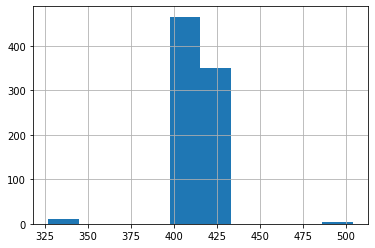

In [9]:
df.full_flowering_date.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

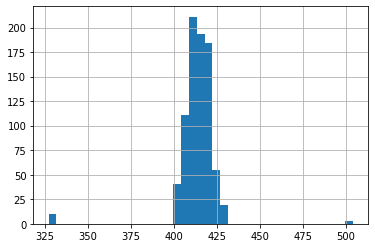

In [10]:
df.full_flowering_date.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [11]:
df.full_flowering_date_doy.mean()

104.54050785973398

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?

In [12]:
df[df.ad >= 1900].full_flowering_date_doy.mean()

100.32743362831859

## 11. How about after 1900?

In [13]:
df[df.ad < 1900].full_flowering_date_doy.mean()

105.20728291316527

## 12. How many times was our data from a title in Japanese poetry?
You'll need to read the documentation inside of the Excel file.

In [14]:
df[df.data_type_code== 4].value_counts().sum()

39

## 13. Show only the years where our data was from a title in Japanese poetry

In [15]:
df_year= df[df.data_type_code== 4]
df_year

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:xlabel='ad'>

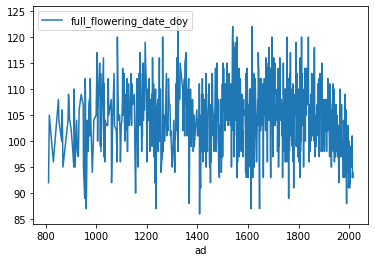

In [16]:
df.plot(x='ad', y='full_flowering_date_doy')

In [17]:
df.dtypes

ad                           int64
full_flowering_date_doy    float64
full_flowering_date        float64
source_code                float64
data_type_code             float64
reference_name              object
dtype: object

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [18]:
df.rolling(10, on='ad', min_periods=5)['full_flowering_date_doy'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: full_flowering_date_doy, dtype: float64

In [19]:
df['rolling_date']= df.rolling(20, on='ad', min_periods=5)['full_flowering_date_doy'].mean()
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/3124660547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_date']= df.rolling(20, on='ad', min_periods=5)['full_flowering_date_doy'].mean()


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00
...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35


<AxesSubplot:xlabel='ad'>

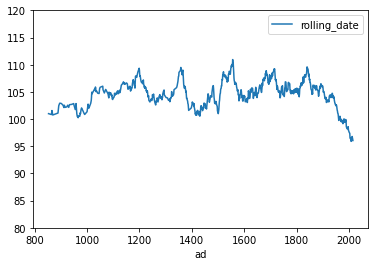

In [20]:
df.plot(x="ad", y="rolling_date", ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [21]:
df['full_flowering_date_format'] = pd.to_datetime(df["full_flowering_date"], format ="%m%d")
df.full_flowering_date_format
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/1494748934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_flowering_date_format'] = pd.to_datetime(df["full_flowering_date"], format ="%m%d")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,full_flowering_date_format
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,1900-04-14
...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,1900-04-09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,1900-04-10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,1900-04-03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,1900-04-04


In [22]:
df['month'] = df.full_flowering_date_format.dt.month
df['day'] = df.full_flowering_date_format.dt.day
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/873685046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.full_flowering_date_format.dt.month
/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/873685046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df.full_flowering_date_format.dt.day


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,full_flowering_date_format,month,day
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,4,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,4,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,4,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,4,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,1900-04-14,4,14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,1900-04-09,4,9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,1900-04-10,4,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,1900-04-03,4,3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,1900-04-04,4,4


In [23]:
df.month=df.month.astype(str)
df.day=df.day.astype(str)
df.dtypes

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


ad                                     int64
full_flowering_date_doy              float64
full_flowering_date                  float64
source_code                          float64
data_type_code                       float64
reference_name                        object
rolling_date                         float64
full_flowering_date_format    datetime64[ns]
month                                 object
day                                   object
dtype: object

In [24]:
df.month = df.month.str.replace("3", "March", regex=False)
df.month = df.month.str.replace("4", "April", regex=False)
df.month = df.month.str.replace("5", "May", regex=False)
df

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,full_flowering_date_format,month,day
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,April,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,April,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,April,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,April,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,1900-04-14,April,14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,1900-04-09,April,9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,1900-04-10,April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,1900-04-03,April,3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,1900-04-04,April,4


### 17. Using your new column, how many blossomings happened in each month?

In [25]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot:>

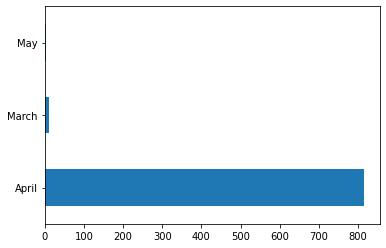

In [26]:
df.month.value_counts().plot(kind="barh")

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [27]:
df

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,full_flowering_date_format,month,day
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,April,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,April,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,April,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,April,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,1900-04-14,April,14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,1900-04-09,April,9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,1900-04-10,April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,1900-04-03,April,3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,1900-04-04,April,4


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

In [28]:
df.dtypes

ad                                     int64
full_flowering_date_doy              float64
full_flowering_date                  float64
source_code                          float64
data_type_code                       float64
reference_name                        object
rolling_date                         float64
full_flowering_date_format    datetime64[ns]
month                                 object
day                                   object
dtype: object

In [29]:
df['date']= df['month'] + " " + df['day']
df

/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_4715/2289000990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= df['month'] + " " + df['day']


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,full_flowering_date_format,month,day,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,April,1,April 1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,April,15,April 15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,April,6,April 6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,April,18,April 18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,1900-04-14,April,14,April 14
...,...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,1900-04-09,April,9,April 9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,1900-04-10,April,10,April 10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,1900-04-03,April,3,April 3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,1900-04-04,April,4,April 4


# YOU ARE DONE.

And **incredible.**